In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df=pd.read_csv('/kaggle/input/fake-news/fake.csv')
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


# cleaning

In [3]:
df.shape

(12999, 20)

In [4]:
# get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [5]:
# rename first column 'uuid' to 'id'
df.rename(columns={'uuid':'id'},inplace=True)

In [6]:
#transform types of published and crawled columns from object to datetime
df['published']=pd.to_datetime(df['published'],utc=True)
df['crawled']=pd.to_datetime(df['crawled'],utc=True)

In [7]:
# add to column 'crawled_by_day' by transform column "crawled"
df.insert(8,'crawled_by_day',pd.to_datetime(df['crawled'],utc=True).dt.strftime('%Y-%m-%d'))
# add to column 'published_by_day' by transform column "published"
df.insert(4,'published_by_day',pd.to_datetime(df['published'],utc=True).dt.strftime('%Y-%m-%d'))

In [8]:
#check null values
df.isnull().sum()

id                       0
ord_in_thread            0
author                2424
published                0
published_by_day         0
title                  680
text                    46
language                 0
crawled                  0
crawled_by_day           0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

##### some columns have null values but I not delete it

In [9]:
# number of duplicated rows
df.duplicated().sum()

0

In [10]:
# check columns validation
columns=[ 'ord_in_thread','language', 'country','type']
for col in columns:
    print(col,df[col].unique(),'\n')
    

ord_in_thread [  0   1   2   3   4   5   6   7   8   9  10  11  29  30  18  19  20  12
  21  13  15  16  17  25  23  14  94  95  96  97  98  63  65  64  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  99 100  50  51  52  53  54  55  57  58
  56  59  60  61  22  24  33  39  26  27  28  31  32  34  35  36  37  38
  40  41  42  43  44  45  46  47  48  49] 

language ['english' 'ignore' 'german' 'french' 'spanish' 'russian' 'greek'
 'finnish' 'portuguese' 'arabic' 'dutch' 'italian' 'turkish' 'norwegian'
 'chinese' 'polish'] 

country ['US' 'CO' 'FR' 'DE' 'GB' 'CA' 'AU' 'EU' 'NL' 'LI' 'SG' 'IO' 'ME' 'TV'
 'ES' 'RU' 'IN' nan 'IR' 'EE' 'SE' 'ZA' 'IS' 'BG' 'CH'] 

type ['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state'] 



# exploring

In [11]:
df.describe()

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.000000,8776.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000,12999.000000
mean,0.891530,38092.996582,0.026122,1.383183,1.727518,10.831833,0.038311,10.831833
std,6.486822,26825.487454,0.122889,9.656838,6.884239,79.798949,0.827335,79.798949
min,0.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,17423.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,34478.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,60570.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,98679.000000,1.000000,309.000000,240.000000,988.000000,65.000000,988.000000


#### spam score over the time

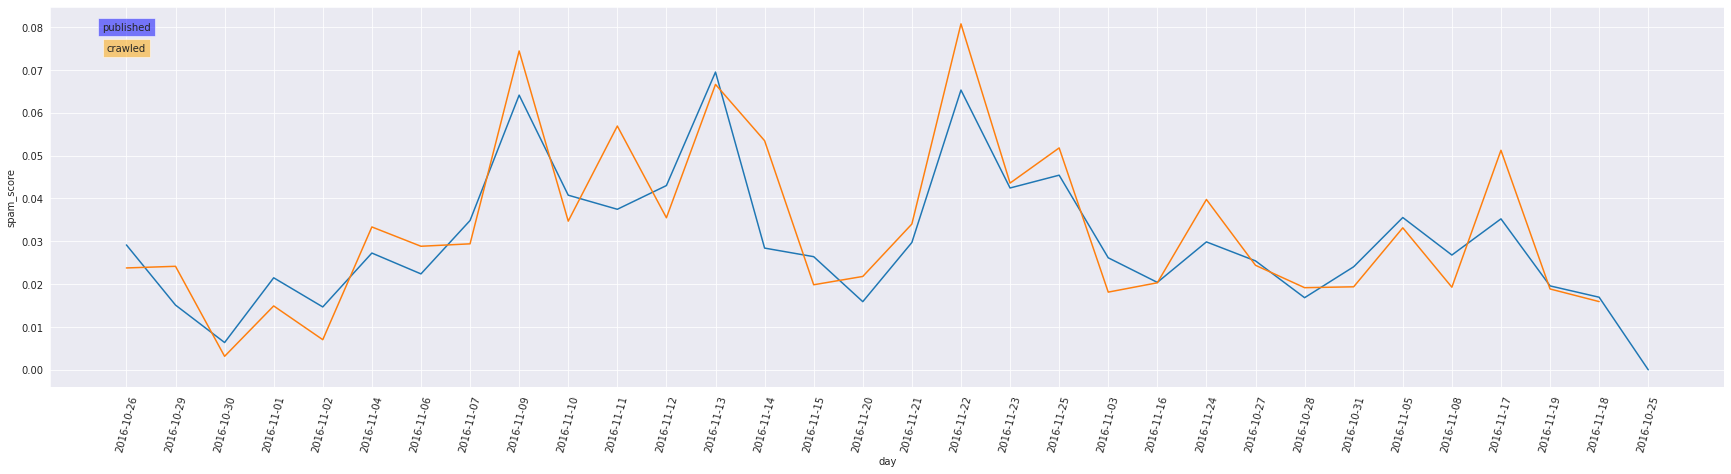

In [18]:
plt.figure(figsize=(30,7))
plt.xticks(rotation=75)
sns.lineplot(x='published_by_day',y='spam_score',data=df,ci=None)
sns.lineplot(x='crawled_by_day',y='spam_score',data=df,ci=None)
plt.text(0,0.08,'published', horizontalalignment='center', verticalalignment='center',bbox=dict(facecolor='blue', alpha=0.5))
plt.text(0,0.075,'crawled', horizontalalignment='center', verticalalignment='center',bbox=dict(facecolor='orange', alpha=0.5))
plt.xlabel('day');

##### crawl date is biger than publish but not in all days 
##### both publish and crawl dates increase between 11-7 and 11-23